# Compute the time slices and GWLs for wind CMIP5

### Author: Jerome Servonat
### Contact: jerome.servonnat at lsce.ipsl.fr

### Import CliMAF

In [1]:
from climaf.api import *

CliMAF version = 1.2.13


CliMAF install => /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post
python => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/python
---
Required softwares to run CliMAF => you are using the following versions/installations:
ncl 6.6.2 => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/ncl
cdo 1.9.6 => /opt/nco/1.9/bin/cdo
nco (ncks) 4.5.2 => /opt/nco-4.5.2/bin/ncks
ncdump fichier => /modfs/modtools/miniconda2/envs/analyse_2.7_v2/bin/ncdump
Check stamping requirements
nco (ncatted) found -> /opt/nco-4.5.2/bin/ncatted
convert found -> /usr/bin/convert
pdftk found -> /usr/bin/pdftk
exiv2 found -> /ciclad-home/jservon/Evaluation/CliMAF/climaf_installs/climaf_V1.2.13_post/bin/exiv2
---


Cache directory set to : /data/jservon/climafcache (use $CLIMAF_CACHE if set) 
Cache directory for remote data set to : /data/jservon/climafcache/remote_data (use $CLIMAF_REMOTE_CACHE if set) 
Available macros read from ~/.climaf.macros are : []


## 1. Copmpute averages for baseline and future periods for 26 and 85

In [2]:
lom_per_exp = dict()

In [3]:
req_dict = dict(project='CMIP5',
                frequency='monthly',
                table = 'Lmon',
                version='latest'
               )

exp_dict_list = dict(
    baseline = dict(experiment='historical',
         period='1995-2005'
        ),
    baseline_ext = dict(experiment='rcp85',
         period='2006-2015'
        ),
    rcp26_mid = dict(experiment='rcp26',
         period='2041-2060'
        ),
    rcp26_far = dict(experiment='rcp26',
         period='2081-2100'
        ),
    rcp85_mid = dict(experiment='rcp85',
         period='2041-2060'
        ),
    rcp85_far = dict(experiment='rcp85',
         period='2081-2100'
        )  
)


ens_exp_dict = dict()
for exp in exp_dict_list:
    ens_exp_dict[exp] = dict()
    print exp
    wreq = req_dict.copy()
    wreq.update(exp_dict_list[exp])

    req = ds(model='*',
             variable = 'mrso',
             **wreq
            )
    models = req.explore('choices')['model']
    ok_models = []
    for model in models:
        req_test = ds(model=model,
                     variable = 'mrso',
                     **wreq
                    )
        if not check_time_consistency_CMIP(req_test):
            print model+' not fully covered'
        else:
            print model+' is fine'
            ok_models.append(model)
            ens_exp_dict[exp][model] = req_test.explore('resolve')

    lom_per_exp[exp] = ok_models


baseline_ext
ACCESS1-0 is fine
ACCESS1-3 is fine
BNU-ESM is fine
CCSM4 is fine
CESM1-BGC is fine
CESM1-CAM5 is fine
CMCC-CESM is fine
CMCC-CM is fine
CMCC-CMS is fine
CNRM-CM5 is fine
CSIRO-Mk3-6-0 is fine
CanESM2 is fine
FGOALS-g2 is fine
FGOALS-s2 is fine
GFDL-CM3 is fine
GFDL-ESM2G is fine
GFDL-ESM2M is fine
GISS-E2-H is fine
GISS-E2-H-CC is fine
GISS-E2-R is fine
GISS-E2-R-CC is fine
HadGEM2-AO is fine
HadGEM2-CC is fine
HadGEM2-ES is fine
IPSL-CM5A-LR is fine
IPSL-CM5A-MR is fine
IPSL-CM5B-LR is fine
MIROC-ESM is fine
MIROC-ESM-CHEM is fine
MIROC5 is fine
MPI-ESM-LR is fine
MPI-ESM-MR is fine
MRI-CGCM3 is fine
MRI-ESM1 is fine
NorESM1-M is fine
NorESM1-ME is fine
bcc-csm1-1 is fine
bcc-csm1-1-m is fine
inmcm4 is fine
rcp85_far
ACCESS1-0 is fine
ACCESS1-3 is fine
BNU-ESM is fine
CCSM4 is fine
CESM1-BGC is fine
CESM1-CAM5 is fine
CMCC-CESM is fine
CMCC-CM is fine
CMCC-CMS is fine
CNRM-CM5 is fine
CSIRO-Mk3-6-0 is fine
CanESM2 is fine
FGOALS-g2 is fine
FGOALS-s2 is fine
GFDL-CM3 is f

# 1. Baseline + baseline ext

In [4]:
lom_baseline     = lom_per_exp['baseline']
lom_baseline_ext = lom_per_exp['baseline_ext']
print 'Models not in both sets:'
print set(lom_baseline) ^ set(lom_baseline_ext)
print 'Models in common:'
common_lom_baseline = list( set(lom_baseline) & set(lom_baseline_ext) )
print common_lom_baseline

Models not in both sets:
set(['MIROC4h', 'CESM1-CAM5-1-FV2', 'HadCM3', 'MPI-ESM-P', 'CESM1-FASTCHEM', 'CNRM-CM5-2', 'GFDL-CM2p1', 'CanCM4', 'CESM1-WACCM'])
Models in common:
['ACCESS1-0', 'ACCESS1-3', 'IPSL-CM5B-LR', 'CMCC-CMS', 'FGOALS-g2', 'MIROC-ESM', 'MIROC5', 'CMCC-CM', 'FGOALS-s2', 'MPI-ESM-MR', 'CSIRO-Mk3-6-0', 'CESM1-BGC', 'HadGEM2-AO', 'inmcm4', 'CanESM2', 'GISS-E2-R-CC', 'BNU-ESM', 'CCSM4', 'GFDL-ESM2G', 'MRI-CGCM3', 'GFDL-ESM2M', 'NorESM1-M', 'IPSL-CM5A-MR', 'IPSL-CM5A-LR', 'GFDL-CM3', 'CNRM-CM5', 'GISS-E2-H', 'MIROC-ESM-CHEM', 'MRI-ESM1', 'NorESM1-ME', 'HadGEM2-ES', 'GISS-E2-R', 'HadGEM2-CC', 'GISS-E2-H-CC', 'CMCC-CESM', 'bcc-csm1-1-m', 'MPI-ESM-LR', 'bcc-csm1-1', 'CESM1-CAM5']


### Create a CliMAF operator to compute sfcWind from uas and vas

In [5]:
wreq_dict = req_dict.copy()
wreq_dict.update(exp_dict_list['baseline'])
ens_baseline_hist = eds(model=common_lom_baseline,
                        variable = 'mrso',
                        **wreq_dict
                       )

wreq_dict = req_dict.copy()
wreq_dict.update(exp_dict_list['baseline_ext'])
ens_baseline_ext = eds(model=common_lom_baseline,
                       variable = 'mrso',
                       **wreq_dict
                      )

## Compute wind and cat baseline and baseline_ext

In [7]:
csync(True)

			error    : file /data/jservon/climafcache/climaf_mcdo_zN_lR/CMIP6_ssp585_tx35isimip_2089_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo_zN_lR/CMIP6_ssp585_tx35isimip_2081_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo_zN_lR/CMIP6_ssp585_tx35isimip_2086_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo_zN_lR/CMIP6_ssp585_tx35isimip_2090_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo_zN_lR/CMIP6_ssp585_tx35isimip_2082_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo_zN_lR/CMIP6_ssp585_tx35isimip_2085_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo_zN_lR/CMIP6_ssp585_tx35isimip_2088_EC-Earth3-Veg_r1i1p1f1.nc is not

			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ff4254237f.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ff2eb6d6fd.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ff6bd341c0.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ff60f86fb3.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ff39ce3aed.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ff433e6057.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ffc8b2369.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3fff2b885a.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/filec3ff5733f484.png is not well formed (no CRS)
			error    : file /data/jservon/climafcache/RtmpGNcENO/f

			error    : file /data/jservon/climafcache/climaf_mcdootGiSv/CMIP6_ssp585_tx35isimip_2087_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdootGiSv/CMIP6_ssp585_tx35isimip_2091_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdootGiSv/CMIP6_ssp585_tx35isimip_2084_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdootGiSv/CMIP6_ssp585_tx35isimip_2083_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdoEbUbxx/CMIP5_rcp85_tx35isimip_2009_CESM1-BGC_r1i1p1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdoEbUbxx/76bcd07255bf8fe00a805846372c72678a6c3b43b0540022946a95_57263.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdoEbUbxx/CMIP5_rcp85_tx35isimip_2015_CESM1-BGC_r1i1p1.nc is not well

			error    : file /data/jservon/climafcache/climaf_mcdo3Q4sHU/CMIP6_ssp585_tx35isimip_2085_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo3Q4sHU/CMIP6_ssp585_tx35isimip_2088_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo3Q4sHU/CMIP6_ssp585_tx35isimip_2087_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo3Q4sHU/CMIP6_ssp585_tx35isimip_2091_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo3Q4sHU/CMIP6_ssp585_tx35isimip_2084_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)
			error    : file /data/jservon/climafcache/climaf_mcdo3Q4sHU/CMIP6_ssp585_tx35isimip_2083_EC-Earth3-Veg_r1i1p1f1.nc is not well formed (no CRS)


In [6]:
ens_baseline_dict = dict()
for model in common_lom_baseline:
    
    # -- Cat baseline and ext
    ens_baseline_dict[model] = ccdo2(ens_baseline_hist[model], ens_baseline_ext[model], operator='cat')
    print(model)
    
    print(cfile(ens_baseline_dict[model]))

ACCESS1-0
/data/jservon/climafcache/06/5f3f58436c1e8bfe6a47b3424e2757a8b97a0d58919b882660c6bc.nc
ACCESS1-3
/data/jservon/climafcache/68/85a52407e171f4960ca7146aaf0845be6eb8080fc1efd7dfc1cd57.nc
FGOALS-g2
/data/jservon/climafcache/90/645b8f3391ab2e159dd3171e6cd20d7249f04e9929e5c3f959849b.nc
CMCC-CMS
/data/jservon/climafcache/bb/6015854178072bf62e62f3a4b3269f7cb44e9b13be516ef9955a68.nc
MIROC-ESM
/data/jservon/climafcache/41/8b124e72123d6b6c077fc69ea9078d2cb3280684f1b4f614537c30.nc
MIROC5
/data/jservon/climafcache/73/b615f189fa331ea41154f92d4afd43907a0054706a66a8816437ee.nc
CMCC-CM
/data/jservon/climafcache/fa/ba4101f788b2e15b70adb51d8a956c64040877292c56326ca66df0.nc
FGOALS-s2
/data/jservon/climafcache/4f/65f30b434d8c6234686ba7b4490cfad14f37932dea961b73602edd.nc
MPI-ESM-MR
/data/jservon/climafcache/a2/260d762fd741d9ddfd27340d3a4e2d8b4bbb2d4b6e88b4c789a029.nc
CSIRO-Mk3-6-0
/data/jservon/climafcache/4e/cbb145ba0d45e54d197d19fe8f74acf1cf876aaa7d639151f23913.nc
CESM1-BGC
/data/jservon/climafc

## Compute averages for each experiment/clim_period

In [7]:
ens_clim_exp_dict = dict()

for exp in ['rcp26_mid','rcp26_far','rcp85_mid','rcp85_far']:    
    print '--> '+exp
    ens_clim_exp_dict[exp] = clim_average(cens(ens_exp_dict[exp]), 'ANM')

--> rcp26_mid
--> rcp26_far
--> rcp85_mid
--> rcp85_far


## Create metadata file

In [6]:
for exp in ens_exp_dict:
    for mem in ens_exp_dict[exp]:
        print ens_exp_dict[exp][mem]

ds('CMIP5%%mrso%2041-2060%global%/bdd%ACCESS1-0%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%ACCESS1-3%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%FGOALS-g2%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%MIROC5%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%CMCC-CMS%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%IPSL-CM5B-LR%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%MIROC-ESM%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%HadGEM2-ES%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%CMCC-CM%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%FGOALS-s2%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%/bdd%MPI-ESM-MR%Lmon%rcp85%r1i1p1%monthly%land%latest')
ds('CMIP5%%mrso%2041-2060%global%

In [7]:
ds('CMIP5%%mrso%2006-2015%global%/bdd%CESM1-CAM5%Lmon%rcp85%r1i1p1%monthly%land%latest').baseFiles()

'/bdd/CMIP5/output/NSF-DOE-NCAR/CESM1-CAM5/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_CESM1-CAM5_rcp85_r1i1p1_200601-210012.nc'

In [23]:
import xarray as xr
def get_tracking_id(ncfile):
    nc = xr.open_dataset(ncfile)
    tracking_id = nc.tracking_id
    nc.close()
    return tracking_id


rows = [['DATA_REF_SYNTAX','FREQUENCY','MODELING_REALM','TABLE_ID','ENS_MEMBER','VERSION_NO','VAR_NAME','HANDLE']]
for exp in ens_exp_dict:
    for mem in ens_exp_dict[exp]:
        try:
            dat = ens_exp_dict[exp][mem]
            print dat.baseFiles()
        except:
            dat = ens_exp_dict[exp][mem].operands[0]
            print dat.baseFiles()
        ds_kvp = dat.explore('resolve').kvp
        ncfile = dat.baseFiles().split(' ')[0]
        try:
            tracking_id = get_tracking_id(ncfile)
        except:
            tracking_id = ''
        dataset_descr = 'CMIP5.output.'+dat.baseFiles().split('/')[4]+'.'+ds_kvp['model']+'.'+ds_kvp['experiment']
        dataset_descr += ','+ds_kvp['frequency']
        dataset_descr += ','+ds_kvp['realm']
        dataset_descr += ','+ds_kvp['table']
        dataset_descr += ','+ds_kvp['realization']
        dataset_descr += ',version_no'
        dataset_descr += ','+ds_kvp['variable']
        dataset_descr += ','+tracking_id
        print(dataset_descr)
        rows.append([dataset_descr])


/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-0/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_ACCESS1-0_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.CSIRO-BOM.ACCESS1-0.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,26a71408-c081-4d9e-ad6b-0663956e62e9
/bdd/CMIP5/output/CSIRO-BOM/ACCESS1-3/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_ACCESS1-3_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.CSIRO-BOM.ACCESS1-3.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,84d000c7-fba5-4a8b-92b0-32ce4a2c4741
/bdd/CMIP5/output/LASG-CESS/FGOALS-g2/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_FGOALS-g2_rcp85_r1i1p1_203601-204512.nc /bdd/CMIP5/output/LASG-CESS/FGOALS-g2/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_FGOALS-g2_rcp85_r1i1p1_204601-205512.nc /bdd/CMIP5/output/LASG-CESS/FGOALS-g2/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_FGOALS-g2_rcp85_r1i1p1_205601-206512.nc
CMIP5.output.LASG-CESS.FGOALS-g2.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,a88f996d-6cd5-4e6f-a7e5-7c2cf2f142b6
/bdd/CMIP5/out

CMIP5.output.CNRM-CERFACS.CNRM-CM5.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,b002add1-14e3-44f0-b92a-cac6ac1ce8a4
/bdd/CMIP5/output/NASA-GISS/GISS-E2-H/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GISS-E2-H_rcp85_r1i1p1_200601-205012.nc /bdd/CMIP5/output/NASA-GISS/GISS-E2-H/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GISS-E2-H_rcp85_r1i1p1_205101-210012.nc
CMIP5.output.NASA-GISS.GISS-E2-H.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,8783e7b2-4001-4f8c-9bf5-cb1c729c43e4
/bdd/CMIP5/output/MIROC/MIROC-ESM-CHEM/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MIROC-ESM-CHEM_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.MIROC.MIROC-ESM-CHEM.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,521f80fd-1d3e-4fe7-adaa-b54ebd14d360
/bdd/CMIP5/output/BCC/bcc-csm1-1/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_bcc-csm1-1_rcp85_r1i1p1_200601-209912.nc
CMIP5.output.BCC.bcc-csm1-1.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,853e77a6-a0c4-4757-b2db-a9da21cc7b55
/bdd/CMIP5/output/NCC/No

/bdd/CMIP5/output/BNU/BNU-ESM/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_BNU-ESM_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.BNU.BNU-ESM.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,518a4842-1d85-4ec4-8302-ce1197451c2b
/bdd/CMIP5/output/NCAR/CCSM4/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_CCSM4_rcp85_r1i1p1_200501-210012.nc /bdd/CMIP5/output/NCAR/CCSM4/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_CCSM4_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.NCAR.CCSM4.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,76b9fb38-7b4c-40a3-873d-64e521408eb1
/bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_rcp85_r1i1p1_200601-201012.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_rcp85_r1i1p1_201101-201512.nc
CMIP5.output.NOAA-GFDL.GFDL-ESM2G.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,494273d7-414a-494a-99af-d5e20410c431
/bdd/CMIP5/output/BCC/bcc-csm1-1-m/rcp85/mon/land/Lmon/r1i1p1/

/bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_rcp26_r1i1p1_204101-204512.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_rcp26_r1i1p1_204601-205012.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_rcp26_r1i1p1_205101-205512.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_rcp26_r1i1p1_205601-206012.nc
CMIP5.output.NOAA-GFDL.GFDL-ESM2G.rcp26,monthly,land,Lmon,r1i1p1,version_no,mrso,763ceccb-2c98-47a2-bbbc-705ef681ee29
/bdd/CMIP5/output/BCC/bcc-csm1-1-m/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_bcc-csm1-1-m_rcp26_r1i1p1_200601-210012.nc
CMIP5.output.BCC.bcc-csm1-1-m.rcp26,monthly,land,Lmon,r1i1p1,version_no,mrso,744a4fef-9a83-4874-abfc-9511d6ffaf85
/bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2M/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2M_rcp26_r1i1p1_204101-204512

CMIP5.output.MOHC.HadGEM2-ES.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,74d98117-f968-4c6c-8fb9-b39adbb72064
/bdd/CMIP5/output/CMCC/CMCC-CM/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_CMCC-CM_rcp85_r1i1p1_208101-209012.nc /bdd/CMIP5/output/CMCC/CMCC-CM/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_CMCC-CM_rcp85_r1i1p1_209101-210012.nc
CMIP5.output.CMCC.CMCC-CM.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,992348ac-f0ef-407f-8550-0358cb9ef024
/bdd/CMIP5/output/LASG-IAP/FGOALS-s2/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_FGOALS-s2_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.LASG-IAP.FGOALS-s2.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,906a437f-6e86-4578-bb12-db7c1d5b7be3
/bdd/CMIP5/output/MPI-M/MPI-ESM-MR/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MPI-ESM-MR_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.MPI-M.MPI-ESM-MR.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,9c218292-628a-417f-88dd-93841ca756fb
/bdd/CMIP5/output/CSIRO-QCCCE/CSIRO-Mk3-6-0/rcp85/mon/land/L

CMIP5.output.CMCC.CMCC-CESM.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,166a5a6a-1e36-4391-900f-8981fdc63972
/bdd/CMIP5/output/MRI/MRI-CGCM3/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MRI-CGCM3_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.MRI.MRI-CGCM3.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,9c0382fb-8298-4de2-b610-e32bba4a06d6
/bdd/CMIP5/output/MPI-M/MPI-ESM-LR/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MPI-ESM-LR_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.MPI-M.MPI-ESM-LR.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,18e79bac-662f-455a-a60f-a725b72c7366
/bdd/CMIP5/output/MRI/MRI-ESM1/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MRI-ESM1_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.MRI.MRI-ESM1.rcp85,monthly,land,Lmon,r1i1p1,version_no,mrso,eda3c8a8-e5ae-42b7-b08d-12adf87463fe
/bdd/CMIP5/output/NSF-DOE-NCAR/CESM1-CAM5/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_CESM1-CAM5_rcp85_r1i1p1_200601-210012.nc
CMIP5.output.NSF-DOE-NCAR.CESM1-CAM5.rcp85,monthly,land,

/bdd/CMIP5/output/MPI-M/MPI-ESM-LR/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MPI-ESM-LR_rcp26_r1i1p1_200601-210012.nc
CMIP5.output.MPI-M.MPI-ESM-LR.rcp26,monthly,land,Lmon,r1i1p1,version_no,mrso,ce304f13-2da8-40f0-be44-6936ec56e920
/bdd/CMIP5/output/BCC/bcc-csm1-1/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_bcc-csm1-1_rcp26_r1i1p1_200601-209912.nc /bdd/CMIP5/output/BCC/bcc-csm1-1/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_bcc-csm1-1_rcp26_r1i1p1_210001-230012.nc
CMIP5.output.BCC.bcc-csm1-1.rcp26,monthly,land,Lmon,r1i1p1,version_no,mrso,457a5bfd-7c3b-48d2-be4c-3eb8d7ad63b8
/bdd/CMIP5/output/NSF-DOE-NCAR/CESM1-CAM5/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_CESM1-CAM5_rcp26_r1i1p1_200601-210012.nc
CMIP5.output.NSF-DOE-NCAR.CESM1-CAM5.rcp26,monthly,land,Lmon,r1i1p1,version_no,mrso,4d309ea3-bf96-47b5-a997-4c954627c3a8
/bdd/CMIP5/output/MIROC/MIROC4h/historical/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MIROC4h_historical_r1i1p1_199101-200012.nc /bdd/CMIP5/output/MIR

CMIP5.output.NCAR.CCSM4.historical,monthly,land,Lmon,r1i1p1,version_no,mrso,cf2ecfcc-fb3b-4564-af53-025af266481e
/bdd/CMIP5/output/NOAA-GFDL/GFDL-CM2p1/historical/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-CM2p1_historical_r1i1p1_199101-199512.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-CM2p1/historical/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-CM2p1_historical_r1i1p1_199601-200012.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-CM2p1/historical/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-CM2p1_historical_r1i1p1_200101-200512.nc
CMIP5.output.NOAA-GFDL.GFDL-CM2p1.historical,monthly,land,Lmon,r1i1p1,version_no,mrso,38c23d33-01bf-4439-9ad0-1f0b326dced7
/bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/historical/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_historical_r1i1p1_199101-199512.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/historical/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-ESM2G_historical_r1i1p1_199601-200012.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-ESM2G/historical/mon/land/Lmon/r1i1p

In [32]:
new_rows = []
for row in rows:
    if (len(row)==1):
        print row[0].split(',')
        new_rows.append(row[0].split(','))
    else:
        print row
        new_rows.append(row)

['DATA_REF_SYNTAX', 'FREQUENCY', 'MODELING_REALM', 'TABLE_ID', 'ENS_MEMBER', 'VERSION_NO', 'VAR_NAME', 'HANDLE']
[u'CMIP5.output.CSIRO-BOM.ACCESS1-0.rcp85', u'monthly', u'land', u'Lmon', u'r1i1p1', u'version_no', u'mrso', u'26a71408-c081-4d9e-ad6b-0663956e62e9']
[u'CMIP5.output.CSIRO-BOM.ACCESS1-3.rcp85', u'monthly', u'land', u'Lmon', u'r1i1p1', u'version_no', u'mrso', u'84d000c7-fba5-4a8b-92b0-32ce4a2c4741']
[u'CMIP5.output.LASG-CESS.FGOALS-g2.rcp85', u'monthly', u'land', u'Lmon', u'r1i1p1', u'version_no', u'mrso', u'a88f996d-6cd5-4e6f-a7e5-7c2cf2f142b6']
[u'CMIP5.output.MIROC.MIROC5.rcp85', u'monthly', u'land', u'Lmon', u'r1i1p1', u'version_no', u'mrso', u'2f9e4915-f816-4a50-8dad-a67372a4262a']
[u'CMIP5.output.CMCC.CMCC-CMS.rcp85', u'monthly', u'land', u'Lmon', u'r1i1p1', u'version_no', u'mrso', u'c8450faf-b797-4f2b-89d8-43c274387401']
[u'CMIP5.output.IPSL.IPSL-CM5B-LR.rcp85', u'monthly', u'land', u'Lmon', u'r1i1p1', u'version_no', u'mrso', u'00fc7b6b-62fe-4efc-a83d-959f61d8d624']
[u

In [33]:
import csv
output_metadata_filename = '/home/jservon/Chapter12_IPCC/data/Figure_S12.4/CMIP5_mrso_time_periods.csv'

with open(output_metadata_filename, 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|')
    for row in new_rows:
        writer.writerow(row)


#Step 1. Load the netcdf file and get values of several global attributes.
import urllib
import json
import xarray as xr
def get_tracking_id(ncfile):
    nc = xr.open_dataset(ncfile)
    tracking_id = nc.tracking_id
    nc.close()
    return tracking_id

wfile = ds('CMIP5%%mrso%2006-2015%global%/bdd%CESM1-CAM5%Lmon%rcp85%r1i1p1%monthly%land%latest').baseFiles()
pid=get_tracking_id(wfile)

#Remove 'hdl:' from the start of the PID

if pid[0:4] == 'hdl:':
    pid = pid[4:]

#Go to the webpage for the PID
pidurl = 'https://handle-esgf.dkrz.de/lp/handles/'+pid

readurl = urllib.urlopen(pidurl)
data = json.loads(readurl.read())

there are two kinds of landing pages, data file or data set. dataset landing pages have the proper version number. if it is a data file landing page, dataset can be reached from there.

try:
    version_number = data["VERSION_NUMBER"]
except KeyError:
    datasetpid = data["URL_ORIGINAL_DATA"][0]["dataset"]
    if datasetpid[0:4] == 'hdl:':
        datasetpid = datasetpid[4:]
    datasetpidurl = 'https://handle-esgf.dkrz.de/lp/handles/'+datasetpid
    readurl_dataset = urllib.urlopen(datasetpidurl)
    data_dataset = json.loads(readurl_dataset.read())
    version_number = data_dataset["VERSION_NUMBER"]

### Add baseline

In [8]:
ens_baseline = cens(ens_baseline_dict)
ens_clim_exp_dict['baseline'] = clim_average(ens_baseline, 'ANM')

In [9]:
ens_clim_exp_dict['baseline'].keys()

['ACCESS1-0',
 'ACCESS1-3',
 'FGOALS-g2',
 'CMCC-CMS',
 'MIROC-ESM',
 'HadGEM2-ES',
 'CMCC-CM',
 'FGOALS-s2',
 'MPI-ESM-MR',
 'CSIRO-Mk3-6-0',
 'CESM1-BGC',
 'HadGEM2-AO',
 'inmcm4',
 'CanESM2',
 'GISS-E2-R-CC',
 'BNU-ESM',
 'CCSM4',
 'GFDL-ESM2G',
 'MRI-CGCM3',
 'GFDL-ESM2M',
 'NorESM1-M',
 'GFDL-CM3',
 'CNRM-CM5',
 'GISS-E2-H',
 'MIROC-ESM-CHEM',
 'MRI-ESM1',
 'NorESM1-ME',
 'MIROC5',
 'GISS-E2-R',
 'HadGEM2-CC',
 'GISS-E2-H-CC',
 'CMCC-CESM',
 'bcc-csm1-1-m',
 'MPI-ESM-LR',
 'bcc-csm1-1',
 'CESM1-CAM5']

In [10]:
diff = fdiv(fsub(cens(ens_clim_exp_dict['rcp85_far']), cens(ens_clim_exp_dict['baseline'])),cens(ens_clim_exp_dict['baseline']))

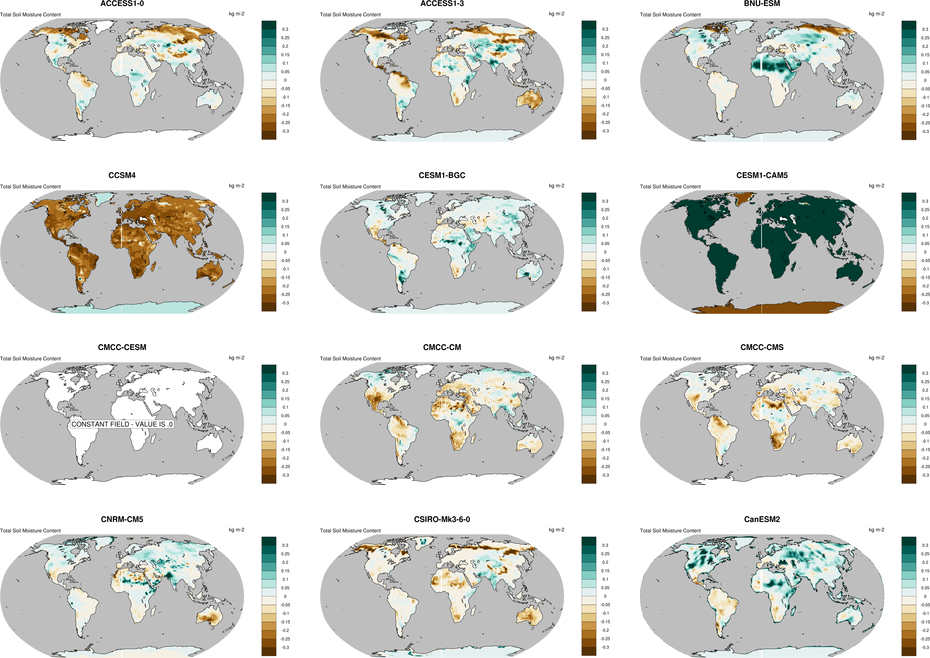

In [17]:
iplot_members(diff, proj='Robinson', N=1, color='MPL_BrBg',
              min=-0.3, max=0.3, delta=0.05, focus='land')

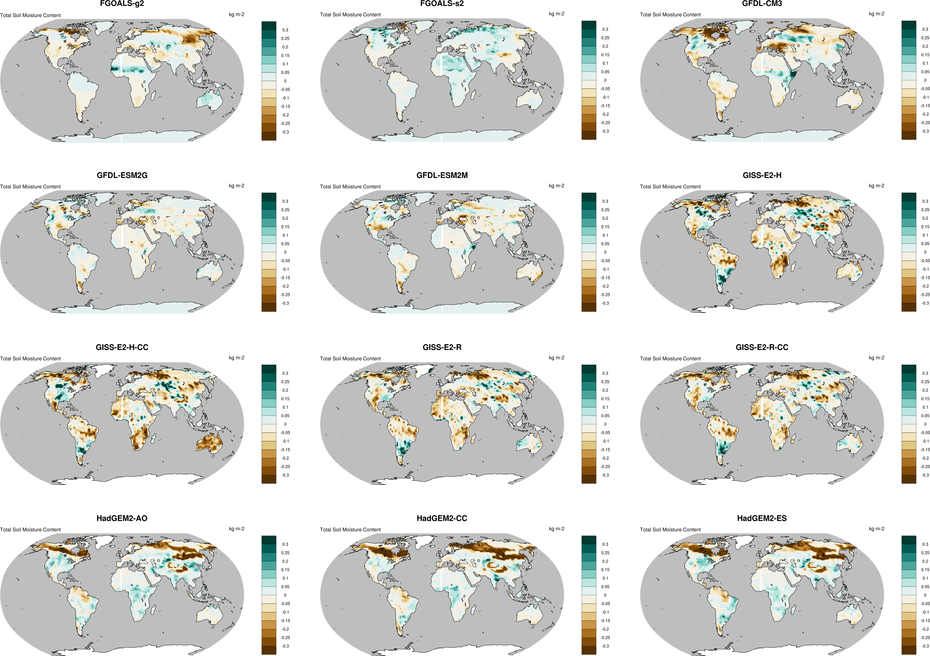

In [18]:
iplot_members(diff, proj='Robinson', N=2, color='MPL_BrBg',
              min=-0.3, max=0.3, delta=0.05, focus='land')

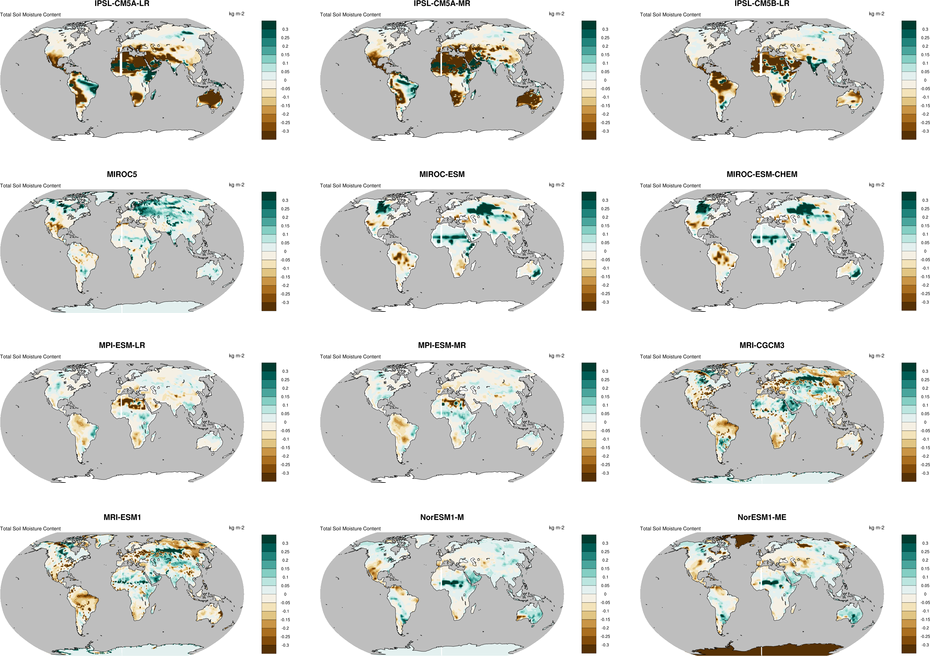

In [19]:
iplot_members(diff, proj='Robinson', N=3, color='MPL_BrBg',
              min=-0.3, max=0.3, delta=0.05, focus='land')

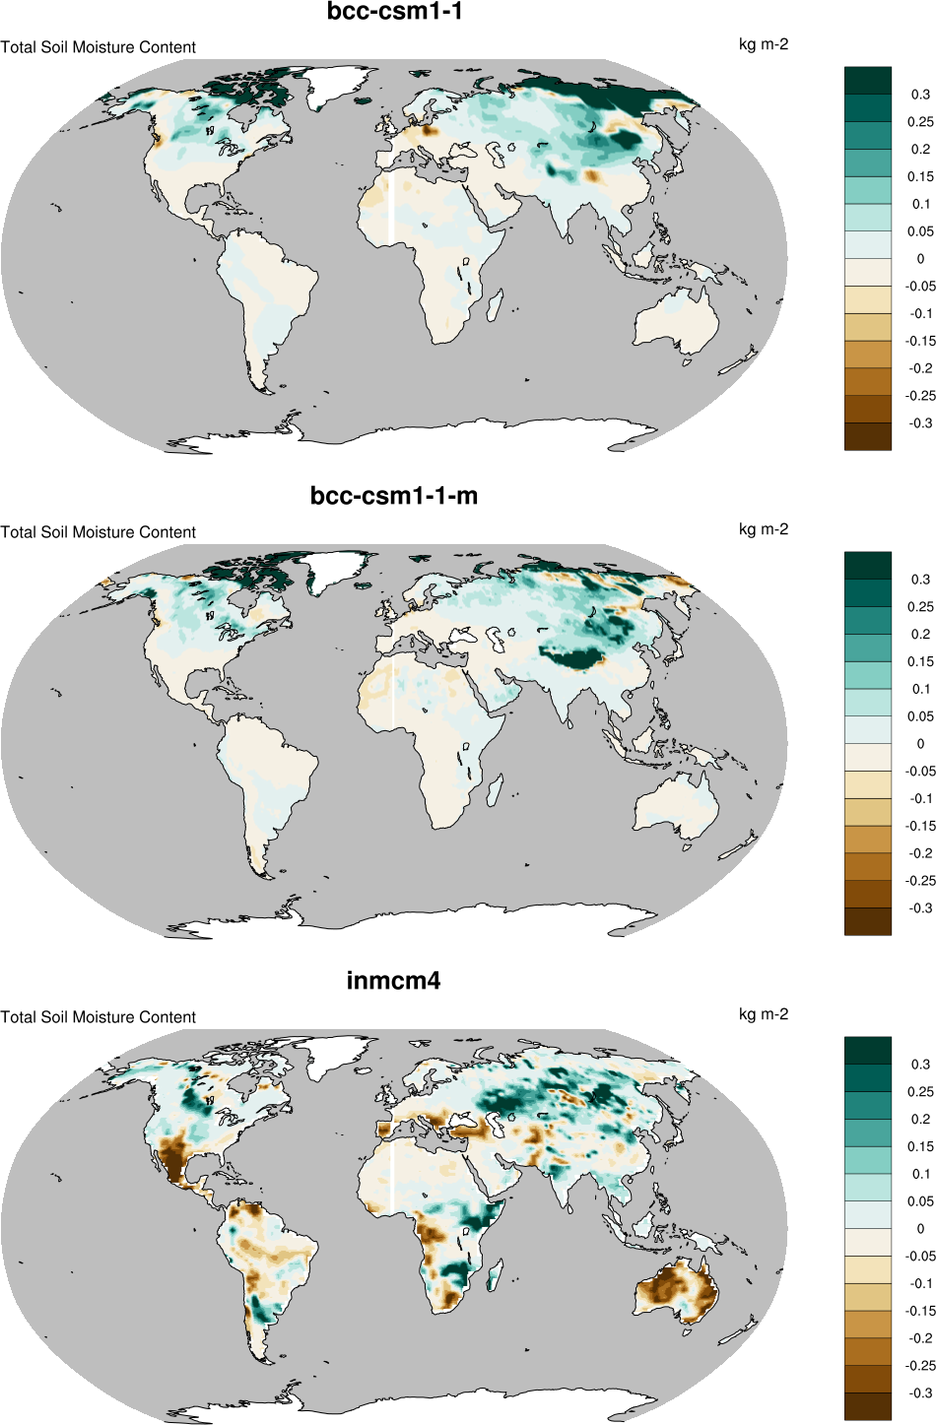

In [20]:
iplot_members(diff, proj='Robinson', N=4, color='MPL_BrBg',
              min=-0.3, max=0.3, delta=0.05, focus='land')

## Compute averages for each GWLs

In [34]:
import csv

GWL_csv = '/home/jservon/Chapter12_IPCC/scripts/ATLAS/warming-levels/CMIP5_Atlas_WarmingLevels.csv'

GWL_dict = dict()
i = 0
with open(GWL_csv) as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')#, quotechar='|')
    for row in spamreader:
        print row
        model = row[0].split('_')[0]
        print model
        GWL_dict[model] = dict()
        if i==0:
            colnames = row
        j = 0
        for elt in row:
            print elt
            GWL_dict[model][colnames[j]] = row[j]
            j = j + 1
        i = i + 1

['model_run', '1.5_rcp26', '2_rcp26', '3_rcp26', '4_rcp26', '1.5_rcp45', '2_rcp45', '3_rcp45', '4_rcp45', '1.5_rcp85', '2_rcp85', '3_rcp85', '4_rcp85']
model
model_run
1.5_rcp26
2_rcp26
3_rcp26
4_rcp26
1.5_rcp45
2_rcp45
3_rcp45
4_rcp45
1.5_rcp85
2_rcp85
3_rcp85
4_rcp85
['ACCESS1-0_r1i1p1', '9999', '9999', '9999', '9999', '2033', '2053', 'NA', 'NA', '2028', '2041', '2061', '2081']
ACCESS1-0
ACCESS1-0_r1i1p1
9999
9999
9999
9999
2033
2053
NA
NA
2028
2041
2061
2081
['ACCESS1-3_r1i1p1', '9999', '9999', '9999', '9999', '2039', '2056', 'NA', 'NA', '2031', '2042', '2062', '2082']
ACCESS1-3
ACCESS1-3_r1i1p1
9999
9999
9999
9999
2039
2056
NA
NA
2031
2042
2062
2082
['bcc-csm1-1-m_r1i1p1', '2009', '2043', 'NA', 'NA', '2010', '2035', 'NA', 'NA', '2007', '2028', '2059', '2085']
bcc-csm1-1-m
bcc-csm1-1-m_r1i1p1
2009
2043
NA
NA
2010
2035
NA
NA
2007
2028
2059
2085
['bcc-csm1-1_r1i1p1', '2022', 'NA', 'NA', 'NA', '2021', '2042', 'NA', 'NA', '2019', '2036', '2059', '2083']
bcc-csm1-1
bcc-csm1-1_r1i1p1
2022

In [35]:
ens_dict_per_GWL = dict()
list_of_GWLs = ['1.5','2','3','4']
for GWL in list_of_GWLs:
    ens_dict_per_GWL[GWL] = dict()

for scenario in ['26','85']:
    list_of_models = lom_per_exp['rcp'+scenario+'_far']
    for wmodel in list_of_models:
        if wmodel in GWL_dict:
            print 'We have : ', wmodel
            print GWL_dict[wmodel]
            for GWL in list_of_GWLs:
                if scenario=='26': GWL_scenario = GWL+'_rcp26'
                if scenario=='85': GWL_scenario = GWL+'_rcp85'

                # --> file nc
                # --> period
                central_year = GWL_dict[wmodel][GWL_scenario]
                if central_year not in ['NA','9999'] and int(central_year)>2015:
                    start_year = str( int(central_year)-9 )
                    end_year = str( int(central_year)+10 )
                    dat = ds(model = wmodel,
                             experiment='rcp'+scenario,
                             period=start_year+'-'+end_year,
                             variable = 'mrso',
                             **req_dict
                             )
                    ens_dict_per_GWL[GWL][wmodel+'_'+scenario] = clim_average(dat, 'ANM')
                    print cfile(ens_dict_per_GWL[GWL][wmodel+'_'+scenario])
        else:
            print 'We dont have GWL info for ',wmodel

We have :  BNU-ESM
{'4_rcp45': 'NA', '1.5_rcp26': 'NA', '2_rcp85': 'NA', '2_rcp45': 'NA', '1.5_rcp85': 'NA', '3_rcp85': 'NA', '4_rcp85': 'NA', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': 'NA', '3_rcp26': 'NA', 'model_run': 'BNU-ESM_r1i1p1', '2_rcp26': 'NA'}
We have :  CCSM4
{'4_rcp45': 'NA', '1.5_rcp26': '2016', '2_rcp85': '2030', '2_rcp45': '2039', '1.5_rcp85': '2014', '3_rcp85': '2057', '4_rcp85': '2077', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': '2017', '3_rcp26': 'NA', 'model_run': 'CCSM4_r1i1p1', '2_rcp26': 'NA'}
/data/jservon/climafcache/07/b7037ecfe374c42776634aa9dec8dba18e8714319a132a1560ac33.nc
We dont have GWL info for  CESM1-CAM5
We have :  CNRM-CM5
{'4_rcp45': 'NA', '1.5_rcp26': '2042', '2_rcp85': '2044', '2_rcp45': '2057', '1.5_rcp85': '2030', '3_rcp85': '2067', '4_rcp85': '2087', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': '2036', '3_rcp26': 'NA', 'model_run': 'CNRM-CM5_r1i1p1', '2_rcp26': 'NA'}
/data/jservon/climafcache/21/9ae8398f093399a1d6694b193d53bf05cde2b

/data/jservon/climafcache/70/6f9d663066c3b4509fc5a9e265e50508da5e73df95a544c76db7e4.nc
/data/jservon/climafcache/bf/f12733f7a954c82e67386917a505660458a2a1cce864e6b05c95a6.nc
/data/jservon/climafcache/ea/3f5638dc0a4295463c5b0057b52a6e9f6eac709971cd5dba4d0cc8.nc
We dont have GWL info for  CESM1-CAM5
We dont have GWL info for  CMCC-CESM
We have :  CMCC-CM
{'4_rcp45': 'NA', '1.5_rcp26': '9999', '2_rcp85': '2041', '2_rcp45': '2050', '1.5_rcp85': '2029', '3_rcp85': '2060', '4_rcp85': '2078', '3_rcp45': 'NA', '4_rcp26': '9999', '1.5_rcp45': '2033', '3_rcp26': '9999', 'model_run': 'CMCC-CM_r1i1p1', '2_rcp26': '9999'}
/data/jservon/climafcache/5a/e69c22831de8027f3a0ba585bf02d98953751817a05923d07aef87.nc
/data/jservon/climafcache/23/09f581538f76699a7c0c94f62ff45d5e133a723f0db61d50fb3630.nc
/data/jservon/climafcache/40/9112b88d85dce6dc6529beb5fd7f697fd3c00a0e44044b108cb691.nc
/data/jservon/climafcache/f8/58a914b75d9a02dcba05fff9f799960055dda9265c60ce268e387e.nc
We have :  CMCC-CMS
{'4_rcp45': 'NA

/data/jservon/climafcache/ff/5a5ad93dccc5a73fcceaf64e9a0b6e8dec5dda89f0112614709e3f.nc
/data/jservon/climafcache/4f/8dfdb95e90b02d4441f762ffe72203e3c75f274529d7af34acdcfe.nc
/data/jservon/climafcache/44/3d44c29d9a5eed6f24b519c5dc8c91c7e326d0b4d3e34bc92dab43.nc
/data/jservon/climafcache/1a/2fa14e1280889f32245f6877f4671a3b6f64aea12254e886748c38.nc
We have :  bcc-csm1-1-m
{'4_rcp45': 'NA', '1.5_rcp26': '2009', '2_rcp85': '2028', '2_rcp45': '2035', '1.5_rcp85': '2007', '3_rcp85': '2059', '4_rcp85': '2085', '3_rcp45': 'NA', '4_rcp26': 'NA', '1.5_rcp45': '2010', '3_rcp26': 'NA', 'model_run': 'bcc-csm1-1-m_r1i1p1', '2_rcp26': '2043'}
/data/jservon/climafcache/4b/8bba141d861c7f8f9ee714388c06c6db0ddb63cacb4e34b9211988.nc
/data/jservon/climafcache/54/deb47cbe9875487597be09acc42e651433534cd9655e3c9ae1dc27.nc
/data/jservon/climafcache/12/8336b833f1121cfd8241556fd1fe4dc9e5851e93006e5bb4ded333.nc
We have :  inmcm4
{'4_rcp45': 'NA', '1.5_rcp26': '9999', '2_rcp85': '2057', '2_rcp45': 'NA', '1.5_rcp85'

In [36]:
ens_dict_per_GWL[GWL]

{'ACCESS1-0_85': time_average(ds('CMIP5%%mrso%2072-2091%global%/bdd%ACCESS1-0%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'ACCESS1-3_85': time_average(ds('CMIP5%%mrso%2073-2092%global%/bdd%ACCESS1-3%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'CCSM4_85': time_average(ds('CMIP5%%mrso%2068-2087%global%/bdd%CCSM4%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'CESM1-BGC_85': time_average(ds('CMIP5%%mrso%2071-2090%global%/bdd%CESM1-BGC%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'CMCC-CMS_85': time_average(ds('CMIP5%%mrso%2068-2087%global%/bdd%CMCC-CMS%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'CMCC-CM_85': time_average(ds('CMIP5%%mrso%2069-2088%global%/bdd%CMCC-CM%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'CNRM-CM5_85': time_average(ds('CMIP5%%mrso%2078-2097%global%/bdd%CNRM-CM5%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'CSIRO-Mk3-6-0_85': time_average(ds('CMIP5%%mrso%2073-2092%global%/bdd%CSIRO-Mk3-6-0%Lmon%rcp85%r1i1p1%monthly%*%latest')),
 'CanESM2_85': time_average(ds('CMIP5%%mrso%2059-2078%global%/bdd%CanESM

In [48]:
import xarray as xr
def get_tracking_id(ncfile):
    nc = xr.open_dataset(ncfile)
    tracking_id = nc.tracking_id
    nc.close()
    return tracking_id


rows = [['DATA_REF_SYNTAX','FREQUENCY','MODELING_REALM','TABLE_ID','ENS_MEMBER','VERSION_NO','VAR_NAME','HANDLE']]
mems_15 = ens_dict_per_GWL['1.5'].keys()
mems_2 = ens_dict_per_GWL['2'].keys()
mems_4 = ens_dict_per_GWL['4'].keys()
all_mems = set(mems_15 + mems_2 + mems_4)
for mem in all_mems:
    tmp_GWL_per_mem = []
    if mem in mems_15:
        tmp_GWL_per_mem.append('1.5')
        GWL = '1.5'
    else:
        tmp_GWL_per_mem.append('none')
    if mem in mems_2:
        tmp_GWL_per_mem.append('2')
        GWL = '2'
    else:
        tmp_GWL_per_mem.append('none')
    if mem in mems_4:
        tmp_GWL_per_mem.append('4')
        GWL = '4'
    else:
        tmp_GWL_per_mem.append('none')
    try:
        dat = ens_dict_per_GWL[GWL][mem]
        print dat.baseFiles()
    except:
        dat = ens_dict_per_GWL[GWL][mem].operands[0]
        print dat.baseFiles()
    ds_kvp = dat.explore('resolve').kvp
    ncfile = dat.baseFiles().split(' ')[0]
    try:
        tracking_id = get_tracking_id(ncfile)
    except:
        tracking_id = ''
    dataset_descr = ['CMIP5.output.'+dat.baseFiles().split('/')[4]+'.'+ds_kvp['model']+'.'+ds_kvp['experiment']]
    dataset_descr.append(ds_kvp['frequency'])
    dataset_descr.append(ds_kvp['realm'])
    dataset_descr.append(ds_kvp['table'])
    dataset_descr.append(ds_kvp['realization'])
    dataset_descr.append('version_no')
    dataset_descr.append(ds_kvp['variable'])
    dataset_descr.append(tracking_id)
    dataset_descr = dataset_descr+tmp_GWL_per_mem
    
    print(dataset_descr)
    rows.append(dataset_descr)


/bdd/CMIP5/output/MPI-M/MPI-ESM-MR/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MPI-ESM-MR_rcp26_r1i1p1_200601-210012.nc
['CMIP5.output.MPI-M.MPI-ESM-MR.rcp26', 'monthly', 'land', 'Lmon', 'r1i1p1', 'version_no', 'mrso', u'3e856ae0-0358-48cd-ac4a-2d9084cb915a', '1.5', 'none', 'none']
/bdd/CMIP5/output/IPSL/IPSL-CM5A-LR/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_IPSL-CM5A-LR_rcp85_r1i1p1_200601-230012.nc
['CMIP5.output.IPSL.IPSL-CM5A-LR.rcp85', 'monthly', 'land', 'Lmon', 'r1i1p1', 'version_no', 'mrso', u'20cc00de-011a-4a4f-8f21-9a942e4ff3c5', 'none', '2', '4']
/bdd/CMIP5/output/MIROC/MIROC5/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MIROC5_rcp26_r1i1p1_200601-210012.nc
['CMIP5.output.MIROC.MIROC5.rcp26', 'monthly', 'land', 'Lmon', 'r1i1p1', 'version_no', 'mrso', u'91e2aba8-e4fc-4b67-9930-43b1ff922393', '1.5', 'none', 'none']
/bdd/CMIP5/output/MRI/MRI-CGCM3/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MRI-CGCM3_rcp85_r1i1p1_200601-210012.nc
['CMIP5.output.MRI.MRI-CGCM3

['CMIP5.output.BCC.bcc-csm1-1.rcp85', 'monthly', 'land', 'Lmon', 'r1i1p1', 'version_no', 'mrso', u'853e77a6-a0c4-4757-b2db-a9da21cc7b55', '1.5', '2', '4']
/bdd/CMIP5/output/MIROC/MIROC5/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MIROC5_rcp85_r1i1p1_200601-210012.nc
['CMIP5.output.MIROC.MIROC5.rcp85', 'monthly', 'land', 'Lmon', 'r1i1p1', 'version_no', 'mrso', u'2f9e4915-f816-4a50-8dad-a67372a4262a', '1.5', '2', 'none']
/bdd/CMIP5/output/MIROC/MIROC-ESM/rcp85/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_MIROC-ESM_rcp85_r1i1p1_200601-210012.nc
['CMIP5.output.MIROC.MIROC-ESM.rcp85', 'monthly', 'land', 'Lmon', 'r1i1p1', 'version_no', 'mrso', u'77b65eba-427a-4a6e-91d8-f0c88b88a367', '1.5', '2', '4']
/bdd/CMIP5/output/NOAA-GFDL/GFDL-CM3/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-CM3_rcp26_r1i1p1_203601-204012.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-CM3/rcp26/mon/land/Lmon/r1i1p1/latest/mrso/mrso_Lmon_GFDL-CM3_rcp26_r1i1p1_204101-204512.nc /bdd/CMIP5/output/NOAA-GFDL/GFDL-CM3/rcp26/

In [49]:
import csv
output_metadata_filename = '/home/jservon/Chapter12_IPCC/data/Figure_S12.4/CMIP5_mrso_gwl.csv'

with open(output_metadata_filename, 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|')
    for row in rows:
        writer.writerow(row)


In [43]:
rows

[['DATA_REF_SYNTAX',
  'FREQUENCY',
  'MODELING_REALM',
  'TABLE_ID',
  'ENS_MEMBER',
  'VERSION_NO',
  'VAR_NAME',
  'HANDLE'],
 [['CMIP5.output.MPI-M.MPI-ESM-MR.rcp26',
   'monthly',
   'land',
   'Lmon',
   'r1i1p1',
   'version_no',
   'mrso',
   u'3e856ae0-0358-48cd-ac4a-2d9084cb915a']],
 [['CMIP5.output.IPSL.IPSL-CM5A-LR.rcp85',
   'monthly',
   'land',
   'Lmon',
   'r1i1p1',
   'version_no',
   'mrso',
   u'20cc00de-011a-4a4f-8f21-9a942e4ff3c5']],
 [['CMIP5.output.MIROC.MIROC5.rcp26',
   'monthly',
   'land',
   'Lmon',
   'r1i1p1',
   'version_no',
   'mrso',
   u'91e2aba8-e4fc-4b67-9930-43b1ff922393']],
 [['CMIP5.output.MRI.MRI-CGCM3.rcp85',
   'monthly',
   'land',
   'Lmon',
   'r1i1p1',
   'version_no',
   'mrso',
   u'9c0382fb-8298-4de2-b610-e32bba4a06d6']],
 [['CMIP5.output.MPI-M.MPI-ESM-LR.rcp85',
   'monthly',
   'land',
   'Lmon',
   'r1i1p1',
   'version_no',
   'mrso',
   u'18e79bac-662f-455a-a60f-a725b72c7366']],
 [['CMIP5.output.NCAR.CCSM4.rcp85',
   'monthly',
  

In [14]:
#We dont have GWL info for  GISS-E2-H
#We dont have GWL info for  GISS-E2-R
#We dont have GWL info for  GISS-E2-H-CC
#We dont have GWL info for  GISS-E2-R-CC
#We dont have GWL info for  HadGEM2-AO
#We dont have GWL info for  CMCC-CESM
#We dont have GWL info for  MRI-ESM1


## Compute regional averages per clim_period / GWL

### Function to compute the reginal averages

In [15]:
import regionmask
import xarray as xr

def weighted_mean(da, weights, dim):
    """Reduce da by a weighted mean along some dimension(s).

    Parameters
    ----------
    da : DataArray
        Object over which the weighted reduction operation is applied.    
    weights : DataArray
        An array of weights associated with the values in this Dataset.
    dim : str or sequence of str, optional
        Dimension(s) over which to apply the weighted `mean`.
        
    Returns
    -------
    weighted_mean : DataArray
        New DataArray with weighted mean applied to its data and
        the indicated dimension(s) removed.
    """

    weighted_sum = (da * weights).sum(dim=dim, skipna=True)
    # need to mask weights where data is not valid
    masked_weights = weights.where(da.notnull())
    sum_of_weights = masked_weights.sum(dim=dim, skipna=True)
    valid_weights = sum_of_weights != 0
    sum_of_weights = sum_of_weights.where(valid_weights)

    return weighted_sum / sum_of_weights

def average_over_AR6_region_back(filename, variable, region_name):

    # -- AR6 regions
    #ar6_all = regionmask.defined_regions.ar6.all
    # -- Get the regions
    ar6_land = regionmask.defined_regions.ar6.land

    #ax = ar6_all.plot()
    # -- Get land/sea mask (generic)
    land_110 = regionmask.defined_regions.natural_earth.land_110

    # -- Get data
    ds = xr.open_dataset(filename, decode_times=False)
    dat = ds[variable]
    dat.values = np.array(dat.values, dtype=np.float32)

    # -- Mask the data
    mask_3D = ar6_land.mask_3D(dat) # AR6 mask
    land_mask = land_110.mask_3D(dat) # Land sea mask
    mask_lsm = mask_3D * land_mask.squeeze(drop=True) # Combine the two

    weights = np.cos(np.deg2rad(dat.lat))
    
    if region_name=='all':
        return weighted_mean(dat, mask_lsm * weights, ("lon", "lat"))
    else:
        if isinstance(region_name, list):
            res = list()
            for region in region_name:
                region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region))
                dat_region = dat.where(region_mask)
                weights_region = weights.where(region_mask)
                res.append( weighted_mean(dat_region, region_mask*weights_region, ("lon","lat")) )
            return res
        else:
            region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region_name))
            dat_region = dat.where(region_mask)
            weights_region = weights.where(region_mask)            
            return weighted_mean(dat_region, region_mask*weights_region, ("lon","lat"))
    
def average_over_AR6_region(filename, variable, region_name):

    # -- AR6 regions
    #ar6_all = regionmask.defined_regions.ar6.all
    # -- Get the regions
    ar6_land = regionmask.defined_regions.ar6.land

    #ax = ar6_all.plot()
    # -- Get land/sea mask (generic)
    land_110 = regionmask.defined_regions.natural_earth.land_110

    # -- Get data
    ds = xr.open_dataset(filename, decode_times=False)
    dat = ds[variable]
    dat.values = np.array(dat.values, dtype=np.float32)

    # -- Mask the data
    mask_3D = ar6_land.mask_3D(dat) # AR6 mask
    land_mask = land_110.mask_3D(dat) # Land sea mask
    mask_lsm = mask_3D * land_mask.squeeze(drop=True) # Combine the two
    
    # -- Compute weights
    if dat.lat.shape == dat.shape:
        weights = np.cos(np.deg2rad(dat.lat))
    else:
        # -- Case dat is has time dim
        if 'time' in dat.dims:
            matlat = np.mean(dat.values, axis=dat.dims.index('time')) * 0
        else:
            matlat = dat.values * 0

        if dat.dims.index('lat')<dat.dims.index('lon'):
            for i in range(0,dat.shape[dat.dims.index('lon')]):
                matlat[:,i] = dat.lat
        else:
            for i in range(0,dat.shape[dat.dims.index('lon')]):
                matlat[i,:] = dat.lat
    
        weights = np.cos(np.deg2rad(matlat))
    
    if region_name=='all':
        return weighted_mean(dat, mask_lsm * weights, ("lon", "lat"))
    else:
        if isinstance(region_name, list):
            res = list()
            for region in region_name:
                region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region))
                dat_region = dat.where(region_mask)
                weights_region = np.where(region_mask, weights, float("nan"))
                #weights_region = weights.where(region_mask)
                res.append( weighted_mean(dat_region, region_mask*weights_region, ("lon","lat")) )
            return res
        else:
            region_mask = mask_lsm.isel(region=list(mask_3D.abbrevs).index(region_name))
            dat_region = dat.where(region_mask)
            weights_region = np.where(region_mask, weights, float("nan"))
            #weights_region = weights.where(region_mask)            
            return weighted_mean(dat_region, region_mask*weights_region, ("lon","lat"))
#
def regions_contained(lon, lat, regions):

    # determine if the longitude needs to be wrapped
    regions_is_180 = regions.lon_180
    grid_is_180 = regionmask.core.utils._is_180(lon.min(), lon.max())

    wrap_lon = not regions_is_180 == grid_is_180

    lon_orig = lon.copy()
    if wrap_lon:
        lon = regionmask.core.utils._wrapAngle(lon, wrap_lon)

    lon = np.asarray(lon).squeeze()
    lat = np.asarray(lat).squeeze()

    if lon.ndim == 1 and lat.ndim == 1:
        poly = shapely.geometry.box(lon.min(), lat.min(), lon.max(), lat.max())

    # convex_hull is not really what we need
    # https://gist.github.com/dwyerk/10561690
    #     elif lon.ndim == 2 and lat.ndim == 2:
    #         # get the convex hull from all points
    #         lonlat = np.stack([lon.ravel(), lat.ravel()], axis=1)
    #         multipoint = shapely.geometry.MultiPoint(lonlat)
    #         poly = multipoint.convex_hull
    else:
        raise ValueError("Cannot currently handle 2D coordinates")

    fully_contained = list()
    for region_poly in regions.polygons:
        res = poly.contains(region_poly)

        fully_contained.append(res)

    return xr.DataArray(
        fully_contained, dims=["region"], coords=dict(region=regions.numbers)
    )

if None:
    region_name = "all"
    variable = 'tx35'
    filename = "/data/jservon/IPCC/tx35/individual_models/CMIP6_ssp585_tx35_2100_NorESM2-LM_r1i1p1f1.nc"

    tmp = average_over_AR6_region(filename, variable, region_name)
    tmp

## Regional averages for future periods and baseline

In [19]:
if None:
    regional_averages_CMIP5 = dict()

    # -- Loop on experiments / horizons
    #wind_ens_clim_exp_dict[exp]
    for ens_exp in ens_clim_exp_dict:
        print ens_exp
        regional_averages_CMIP5[ens_exp] = dict()
        # -- Loop on the members of each ensemble
        for mem in ens_clim_exp_dict[ens_exp]:
            print mem
            # -- Compute the averages for each AR6 region thanks to regionmask
            tmp = average_over_AR6_region(cfile(ens_clim_exp_dict[ens_exp][mem]), 'mrso', 'all')
            region_names = tmp.abbrevs
            for tmp_region_name in region_names:
                region_name = str(tmp_region_name.values)
                #print region_name
                region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                if region_name not in regional_averages_CMIP5[ens_exp]:
                    regional_averages_CMIP5[ens_exp][region_name] = [region_value]
                else:
                    regional_averages_CMIP5[ens_exp][region_name].append(region_value)
    #
regional_averages_CMIP5 = dict()

# -- Loop on experiments / horizons
for ens_exp in ens_clim_exp_dict:
    print ens_exp
    regional_averages_CMIP5[ens_exp] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_clim_exp_dict[ens_exp]:
        print mem
        # -- Compute the averages for each AR6 region thanks to regionmask
        tmp = average_over_AR6_region(cfile(ens_clim_exp_dict[ens_exp][mem]), 'mrso', 'all')
        region_names = list(tmp.abbrevs)
        ttmp = average_over_AR6_region(cfile(ens_clim_exp_dict[ens_exp][mem]), 'mrso', region_names)
        for tmp_region_name in region_names:
            region_name = str(tmp_region_name.values)
            region_value = float(ttmp[list(tmp.abbrevs).index(region_name)])
            print region_name, region_value
            if region_name not in regional_averages_CMIP5[ens_exp]:
                regional_averages_CMIP5[ens_exp][region_name] = [region_value]
            else:
                regional_averages_CMIP5[ens_exp][region_name].append(region_value)
#


rcp26_mid
HadGEM2-AO
GIC 151.936340332
NWN 1018.42584229
NEN 991.554382324
WNA 597.195800781
CNA 655.472290039
ENA 767.890075684
NCA 553.793640137
SCA 679.986755371
CAR 548.103149414
NWS 991.264465332


KeyboardInterrupt: 

In [18]:
ens_clim_exp_dict[ens_exp].keys()

['ACCESS1-0',
 'ACCESS1-3',
 'FGOALS-g2',
 'CMCC-CMS',
 'MIROC-ESM',
 'HadGEM2-ES',
 'CMCC-CM',
 'FGOALS-s2',
 'MPI-ESM-MR',
 'CSIRO-Mk3-6-0',
 'CESM1-BGC',
 'HadGEM2-AO',
 'inmcm4',
 'CanESM2',
 'GISS-E2-R-CC',
 'BNU-ESM',
 'CCSM4',
 'GFDL-ESM2G',
 'MRI-CGCM3',
 'GFDL-ESM2M',
 'NorESM1-M',
 'GFDL-CM3',
 'CNRM-CM5',
 'GISS-E2-H',
 'MIROC-ESM-CHEM',
 'MRI-ESM1',
 'NorESM1-ME',
 'MIROC5',
 'GISS-E2-R',
 'HadGEM2-CC',
 'GISS-E2-H-CC',
 'CMCC-CESM',
 'bcc-csm1-1-m',
 'MPI-ESM-LR',
 'bcc-csm1-1',
 'CESM1-CAM5']

In [ ]:
CMCC-CMS 77
MIROC-ESM 2600


ACCESS1-0
ACCESS1-3
FGOALS-g2
CMCC-CMS
MIROC-ESM
HadGEM2-ES
CMCC-CM
FGOALS-s2
MPI-ESM-MR
CSIRO-Mk3-6-0
CESM1-BGC
HadGEM2-AO
inmcm4
CanESM2
GISS-E2-R-CC
BNU-ESM
IPSL-CM5B-LR
GFDL-ESM2G
MRI-CGCM3
GFDL-ESM2M
CCSM4
NorESM1-M
IPSL-CM5A-MR
IPSL-CM5A-LR
GFDL-CM3
CNRM-CM5
GISS-E2-H
MIROC-ESM-CHEM
MRI-ESM1
NorESM1-ME
MIROC5
GISS-E2-R
HadGEM2-CC
GISS-E2-H-CC
CMCC-CESM
bcc-csm1-1-m
MPI-ESM-LR
bcc-csm1-1
CESM1-CAM5

## Differences for future periods against baseline

In [18]:
ens_baseline_dict.keys()

['ACCESS1-0',
 'ACCESS1-3',
 'FGOALS-g2',
 'CMCC-CMS',
 'MPI-ESM-LR',
 'MIROC-ESM',
 'MIROC5',
 'CMCC-CM',
 'FGOALS-s2',
 'MPI-ESM-MR',
 'CSIRO-Mk3-6-0',
 'CESM1-BGC',
 'inmcm4',
 'CanESM2',
 'GISS-E2-R-CC',
 'BNU-ESM',
 'CCSM4',
 'GFDL-ESM2G',
 'bcc-csm1-1-m',
 'GFDL-ESM2M',
 'NorESM1-M',
 'GFDL-CM3',
 'CNRM-CM5',
 'GISS-E2-H',
 'MIROC-ESM-CHEM',
 'bcc-csm1-1',
 'NorESM1-ME',
 'HadGEM2-AO',
 'GISS-E2-R',
 'HadGEM2-CC',
 'GISS-E2-H-CC',
 'CMCC-CESM',
 'MRI-CGCM3',
 'HadGEM2-ES',
 'MRI-ESM1',
 'CESM1-CAM5']

In [20]:
regional_averages_diff_CMIP5 = dict()
# -- Loop on experiments / horizons
#wind_ens_clim_exp_dict[exp]
for ens_exp in ens_clim_exp_dict:
    if ens_exp not in ['baseline']:
        print ens_exp
        regional_averages_diff_CMIP5[ens_exp] = dict()
        # -- Loop on the members of each ensemble
        for mem in ens_clim_exp_dict[ens_exp]:
            if mem.split('_')[0] in ens_baseline_dict:
                print mem
                # -- Compute the averages for each AR6 region thanks to regionmask
                tmp = average_over_AR6_region(cfile(ens_clim_exp_dict[ens_exp][mem]), 'mrso', 'all')
                region_names = list(tmp.abbrevs)
                ttmp = average_over_AR6_region(cfile(ens_clim_exp_dict[ens_exp][mem]), 'mrso', region_names)
                ttmp_baseline = average_over_AR6_region(cfile(ens_clim_exp_dict['baseline'][mem]), 'mrso', region_names)
                for tmp_region_name in region_names:
                    region_name = str(tmp_region_name.values)
                    region_value = float(ttmp[list(tmp.abbrevs).index(region_name)])
                    region_value_baseline = float(ttmp_baseline[list(tmp.abbrevs).index(region_name)])
                    if region_value_baseline==0:
                        if region_value==0:
                            perc_val = 0
                        else:
                            perc_val = -99999
                    else:
                        perc_val = 100*(region_value - region_value_baseline)/region_value_baseline
                    if region_name not in regional_averages_diff_CMIP5[ens_exp]:
                        regional_averages_diff_CMIP5[ens_exp][region_name] = [perc_val]
                    else:
                        regional_averages_diff_CMIP5[ens_exp][region_name].append(perc_val)
#
if None:
    regional_averages_diff_CMIP5 = dict()
    # -- Loop on experiments / horizons
    #wind_ens_clim_exp_dict[exp]
    for ens_exp in ens_clim_exp_dict:
        if ens_exp not in ['baseline']:
            print ens_exp
            regional_averages_diff_CMIP5[ens_exp] = dict()
            # -- Loop on the members of each ensemble
            for mem in ens_clim_exp_dict[ens_exp]:
                if mem.split('_')[0] in ens_baseline_dict:
                    print mem
                    # -- Compute the averages for each AR6 region thanks to regionmask
                    tmp = average_over_AR6_region(cfile(ens_clim_exp_dict[ens_exp][mem]), 'mrso', 'all')
                    tmp_baseline = average_over_AR6_region(cfile(ens_clim_exp_dict['baseline'][mem]), 'mrso', 'all')
                    region_names = tmp.abbrevs
                    for tmp_region_name in region_names:
                        region_name = str(tmp_region_name.values)
                        #print region_name
                        region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                        region_value_baseline = float(tmp_baseline.sel(region=list(tmp.abbrevs).index(region_name)).values)
                        if region_value_baseline==0:
                            if region_value==0:
                                perc_val = 0
                            else:
                                perc_val = -99999
                        else:
                            perc_val = 100*(region_value - region_value_baseline)/region_value_baseline
                        if region_name not in regional_averages_diff_CMIP5[ens_exp]:
                            regional_averages_diff_CMIP5[ens_exp][region_name] = [perc_val]
                        else:
                            regional_averages_diff_CMIP5[ens_exp][region_name].append(perc_val)
            #

rcp26_mid
HadGEM2-AO
BNU-ESM
FGOALS-g2
CCSM4
GFDL-ESM2G
bcc-csm1-1-m
GFDL-ESM2M
NorESM1-M
GISS-E2-H
GFDL-CM3
MIROC-ESM
CNRM-CM5
HadGEM2-ES
CanESM2
MIROC-ESM-CHEM
MRI-CGCM3
NorESM1-ME
MIROC5
GISS-E2-R
MPI-ESM-MR
CSIRO-Mk3-6-0
MPI-ESM-LR
bcc-csm1-1
CESM1-CAM5
rcp26_far
HadGEM2-AO
BNU-ESM
FGOALS-g2
CCSM4
GFDL-ESM2G
bcc-csm1-1-m
GFDL-ESM2M
NorESM1-M
GISS-E2-H
GFDL-CM3
MIROC-ESM
CNRM-CM5
HadGEM2-ES
CanESM2
MIROC-ESM-CHEM
MRI-CGCM3
NorESM1-ME
MIROC5
GISS-E2-R
MPI-ESM-MR
CSIRO-Mk3-6-0
MPI-ESM-LR
bcc-csm1-1
CESM1-CAM5
rcp85_far
ACCESS1-0
ACCESS1-3
FGOALS-g2
CMCC-CMS
MIROC-ESM
HadGEM2-ES
CMCC-CM
FGOALS-s2
MPI-ESM-MR
CSIRO-Mk3-6-0
CESM1-BGC
HadGEM2-AO
inmcm4
CanESM2
GISS-E2-R-CC
BNU-ESM
CCSM4
GFDL-ESM2G
MRI-CGCM3
GFDL-ESM2M
NorESM1-M
GFDL-CM3
CNRM-CM5
GISS-E2-H
MIROC-ESM-CHEM
MRI-ESM1
NorESM1-ME
MIROC5
GISS-E2-R
HadGEM2-CC
GISS-E2-H-CC
CMCC-CESM
bcc-csm1-1-m
MPI-ESM-LR
bcc-csm1-1
CESM1-CAM5
rcp85_mid
ACCESS1-0
ACCESS1-3
FGOALS-g2
CMCC-CMS
MIROC-ESM
HadGEM2-ES
CMCC-CM
FGOALS-s2
MPI-ESM-MR
CSIRO-M

## Regional averages for GWLs

In [21]:
if None:
    for GWL in ens_dict_per_GWL :
        print GWL
        regional_averages_CMIP5[GWL] = dict()
        # -- Loop on the members of each ensemble
        for mem in ens_dict_per_GWL[GWL]:
            print mem
            # -- Compute the averages for each AR6 region thanks to regionmask
            tmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'mrso', 'all')
            region_names = list(tmp.abbrevs)
            ttmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'mrso', region_names)
            for tmp_region_name in region_names:
                region_name = str(tmp_region_name.values)
                region_value = float(ttmp[list(tmp.abbrevs).index(region_name)])
                print region_name, region_value
                if region_name not in regional_averages_CMIP5[GWL]:
                    regional_averages_CMIP5[GWL][region_name] = [region_value]
                else:
                    regional_averages_CMIP5[GWL][region_name].append(region_value)

if None:
    for GWL in ens_dict_per_GWL:
        print GWL
        regional_averages_CMIP5[GWL] = dict()
        # -- Loop on the members of each ensemble
        for mem in ens_dict_per_GWL[GWL]:
            print mem
            # -- Compute the averages for each AR6 region thanks to regionmask
            tmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'mrso', 'all')
            region_names = tmp.abbrevs
            for tmp_region_name in region_names:
                region_name = str(tmp_region_name.values)
                #print region_name
                region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                if region_name not in regional_averages_CMIP5[GWL]:
                    regional_averages_CMIP5[GWL][region_name] = [region_value]
                else:
                    regional_averages_CMIP5[GWL][region_name].append(region_value)

## Differences for GWLs

In [23]:
for GWL in ens_dict_per_GWL:
    print GWL
    regional_averages_diff_CMIP5[GWL] = dict()
    # -- Loop on the members of each ensemble
    for mem in ens_dict_per_GWL[GWL]:
        wmem = mem.replace('_26','').replace('_85','')
        print wmem
        if wmem in ens_baseline_dict:
            print mem
            tmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'mrso', 'all')
            region_names = list(tmp.abbrevs)
            ttmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'mrso', region_names)
            ttmp_baseline = average_over_AR6_region(cfile(ens_clim_exp_dict['baseline'][wmem]), 'mrso', region_names)
            for tmp_region_name in region_names:
                region_name = str(tmp_region_name.values)
                region_value = float(ttmp[region_names.index(region_name)])
                region_value_baseline = float(ttmp_baseline[region_names.index(region_name)])
                if region_value_baseline==0:
                    if region_value==0:
                        perc_val = 0
                    else:
                        perc_val = -99999
                else:
                    perc_val = 100*(region_value - region_value_baseline)/region_value_baseline
                if region_name not in regional_averages_diff_CMIP5[GWL]:
                    regional_averages_diff_CMIP5[GWL][region_name] = [perc_val]
                else:
                    regional_averages_diff_CMIP5[GWL][region_name].append(perc_val)


if None:
    for GWL in ens_dict_per_GWL:
        print GWL
        regional_averages_diff_CMIP5[GWL] = dict()
        # -- Loop on the members of each ensemble
        for mem in ens_dict_per_GWL[GWL]:
            wmem = mem.replace('_26','').replace('_85','')
            print wmem
            if wmem in ens_baseline_dict:
                print mem
                # -- Compute the averages for each AR6 region thanks to regionmask
                tmp = average_over_AR6_region(cfile(ens_dict_per_GWL[GWL][mem]), 'mrso', 'all')
                tmp_baseline = average_over_AR6_region(cfile(ens_clim_exp_dict['baseline'][wmem]), 'mrso', 'all')
                region_names = tmp.abbrevs
                for tmp_region_name in region_names:
                    region_name = str(tmp_region_name.values)
                    #print region_name
                    region_value = float(tmp.sel(region=list(tmp.abbrevs).index(region_name)).values)
                    region_value_baseline = float(tmp_baseline.sel(region=list(tmp.abbrevs).index(region_name)).values)
                    if region_value_baseline==0:
                        if region_value==0:
                            perc_val = 0
                        else:
                            perc_val = -99999
                    else:
                        perc_val = 100*(region_value - region_value_baseline)/region_value_baseline
                    if region_name not in regional_averages_diff_CMIP5[GWL]:
                        regional_averages_diff_CMIP5[GWL][region_name] = [perc_val]
                    else:
                        regional_averages_diff_CMIP5[GWL][region_name].append(perc_val)


1.5
MPI-ESM-MR
MPI-ESM-MR_26
MIROC5
MIROC5_26
MRI-CGCM3
MRI-CGCM3_85
MPI-ESM-LR
MPI-ESM-LR_85
GFDL-ESM2G
GFDL-ESM2G_85
MPI-ESM-MR
MPI-ESM-MR_85
HadGEM2-CC
HadGEM2-CC_85
CMCC-CM
CMCC-CM_85
CNRM-CM5
CNRM-CM5_26
CMCC-CMS
CMCC-CMS_85
NorESM1-M
NorESM1-M_85
CNRM-CM5
CNRM-CM5_85
MIROC-ESM-CHEM
MIROC-ESM-CHEM_26
CCSM4
CCSM4_26
bcc-csm1-1
bcc-csm1-1_26
ACCESS1-3
ACCESS1-3_85
MPI-ESM-LR
MPI-ESM-LR_26
bcc-csm1-1
bcc-csm1-1_85
MIROC5
MIROC5_85
MIROC-ESM
MIROC-ESM_85
GFDL-CM3
GFDL-CM3_26
MIROC-ESM
MIROC-ESM_26
CESM1-BGC
CESM1-BGC_85
CSIRO-Mk3-6-0
CSIRO-Mk3-6-0_26
GFDL-CM3
GFDL-CM3_85
MIROC-ESM-CHEM
MIROC-ESM-CHEM_85
ACCESS1-0
ACCESS1-0_85
inmcm4
inmcm4_85
HadGEM2-ES
HadGEM2-ES_85
GFDL-ESM2M
GFDL-ESM2M_85
HadGEM2-ES
HadGEM2-ES_26
CSIRO-Mk3-6-0
CSIRO-Mk3-6-0_85
3
MRI-CGCM3
MRI-CGCM3_85
CCSM4
CCSM4_85
GFDL-ESM2G
GFDL-ESM2G_85
MPI-ESM-MR
MPI-ESM-MR_85
HadGEM2-CC
HadGEM2-CC_85
CMCC-CM
CMCC-CM_85
CMCC-CMS
CMCC-CMS_85
GFDL-ESM2M
GFDL-ESM2M_85
CNRM-CM5
CNRM-CM5_85
MPI-ESM-LR
MPI-ESM-LR_85
ACCESS1-3
ACCESS

### Compute the percentiles per region and save in json

In [ ]:
quantiles_dict = dict()
for clim_period in regional_averages_CMIP5:
    quantiles_dict[clim_period] = dict()
    for region_name in regional_averages_CMIP5[clim_period]:
        print clim_period, region_name
        quantiles_dict[clim_period][region_name] = dict()
        dat = np.array(regional_averages_CMIP5[clim_period][region_name])
        q10 = np.quantile(dat, 0.1)
        q50 = np.quantile(dat, 0.5)
        q90 = np.quantile(dat, 0.9)
        quantiles_dict[clim_period][region_name] = [q10, q50, q90]

import json
ensemble = 'CMIP5'
outfilename = '/home/jservon/Chapter12_IPCC/data/Figure_S12.4/'+ensemble+'_SM_AR6_regional_averages.json'
#print outfilename
with open(outfilename, 'w') as fp:
    json.dump(quantiles_dict, fp, sort_keys=True, indent=4)

In [24]:
quantiles_dict = dict()
for clim_period in regional_averages_diff_CMIP5:
    quantiles_dict[clim_period] = dict()
    for region_name in regional_averages_diff_CMIP5[clim_period]:
        print clim_period, region_name
        quantiles_dict[clim_period][region_name] = dict()
        dat = np.array(regional_averages_diff_CMIP5[clim_period][region_name])
        q10 = np.quantile(dat, 0.1)
        q50 = np.quantile(dat, 0.5)
        q90 = np.quantile(dat, 0.9)
        quantiles_dict[clim_period][region_name] = [q10, q50, q90]

import json
ensemble = 'CMIP5'
outfilename = '/home/jservon/Chapter12_IPCC/data/Figure_S12.4/'+ensemble+'_SM_diff_perc2020_AR6_regional_averages.json'
#print outfilename
with open(outfilename, 'w') as fp:
    json.dump(quantiles_dict, fp, sort_keys=True, indent=4)

1.5 NEN
1.5 NCA
1.5 WAN
1.5 EEU
1.5 CAR
1.5 WSAF
1.5 CAU
1.5 WSB
1.5 NAU
1.5 SWS
1.5 NEU
1.5 NES
1.5 TIB
1.5 WNA
1.5 SES
1.5 SAM
1.5 NWS
1.5 NSA
1.5 SCA
1.5 MDG
1.5 CAF
1.5 SEAF
1.5 NZ
1.5 RAR
1.5 SEA
1.5 SAS
1.5 NWN
1.5 EAU
1.5 SAU
1.5 ENA
1.5 WAF
1.5 WCA
1.5 SAH
1.5 GIC
1.5 ESB
1.5 RFE
1.5 CNA
1.5 EAS
1.5 ARP
1.5 MED
1.5 ECA
1.5 NEAF
1.5 EAN
1.5 WCE
1.5 SSA
1.5 ESAF
rcp26_far NEN
rcp26_far NCA
rcp26_far WAN
rcp26_far EEU
rcp26_far CAR
rcp26_far WSAF
rcp26_far CAU
rcp26_far WSB
rcp26_far NAU
rcp26_far SWS
rcp26_far NEU
rcp26_far NES
rcp26_far TIB
rcp26_far WNA
rcp26_far SES
rcp26_far SAM
rcp26_far NWS
rcp26_far NSA
rcp26_far SCA
rcp26_far MDG
rcp26_far CAF
rcp26_far SEAF
rcp26_far NZ
rcp26_far RAR
rcp26_far SEA
rcp26_far SAS
rcp26_far NWN
rcp26_far EAU
rcp26_far SAU
rcp26_far ENA
rcp26_far WAF
rcp26_far WCA
rcp26_far SAH
rcp26_far GIC
rcp26_far ESB
rcp26_far RFE
rcp26_far CNA
rcp26_far EAS
rcp26_far ARP
rcp26_far MED
rcp26_far ECA
rcp26_far NEAF
rcp26_far EAN
rcp26_far WCE
rcp26_far S

/modfs/modtools/miniconda2/envs/analyse_2.7_v2/lib/python2.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


 ENA
rcp26_mid WAF
rcp26_mid WCA
rcp26_mid SAH
rcp26_mid GIC
rcp26_mid ESB
rcp26_mid RFE
rcp26_mid CNA
rcp26_mid EAS
rcp26_mid ARP
rcp26_mid MED
rcp26_mid ECA
rcp26_mid NEAF
rcp26_mid EAN
rcp26_mid WCE
rcp26_mid SSA
rcp26_mid ESAF
rcp85_far NEN
rcp85_far NCA
rcp85_far WAN
rcp85_far EEU
rcp85_far CAR
rcp85_far WSAF
rcp85_far CAU
rcp85_far WSB
rcp85_far NAU
rcp85_far SWS
rcp85_far NEU
rcp85_far NES
rcp85_far TIB
rcp85_far WNA
rcp85_far SES
rcp85_far SAM
rcp85_far NWS
rcp85_far NSA
rcp85_far SCA
rcp85_far MDG
rcp85_far CAF
rcp85_far SEAF
rcp85_far NZ
rcp85_far RAR
rcp85_far SEA
rcp85_far SAS
rcp85_far NWN
rcp85_far EAU
rcp85_far SAU
rcp85_far ENA
rcp85_far WAF
rcp85_far WCA
rcp85_far SAH
rcp85_far GIC
rcp85_far ESB
rcp85_far RFE
rcp85_far CNA
rcp85_far EAS
rcp85_far ARP
rcp85_far MED
rcp85_far ECA
rcp85_far NEAF
rcp85_far EAN
rcp85_far WCE
rcp85_far SSA
rcp85_far ESAF
3 NEN
3 NCA
3 WAN
3 EEU
3 CAR
3 WSAF
3 CAU
3 WSB
3 NAU
3 SWS
3 NEU
3 NES
3 TIB
3 WNA
3 SES
3 SAM
3 NWS
3 NSA
3 SCA
3 MDG
3